In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/raw/bureau.csv')
print(f"Shape: {df.shape}")
print(f"Clients uniques: {df['SK_ID_CURR'].nunique()}")
print(f"Credits uniques: {df['SK_ID_BUREAU'].nunique()}")
print(f"Mean Credits by client: {len(df)/df['SK_ID_CURR'].nunique():.2f}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Shape: (1716428, 17)
Clients uniques: 305811
Credits uniques: 1716428
Mean Credits by client: 5.61
Memory usage: 512.11 MB


In [4]:
df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


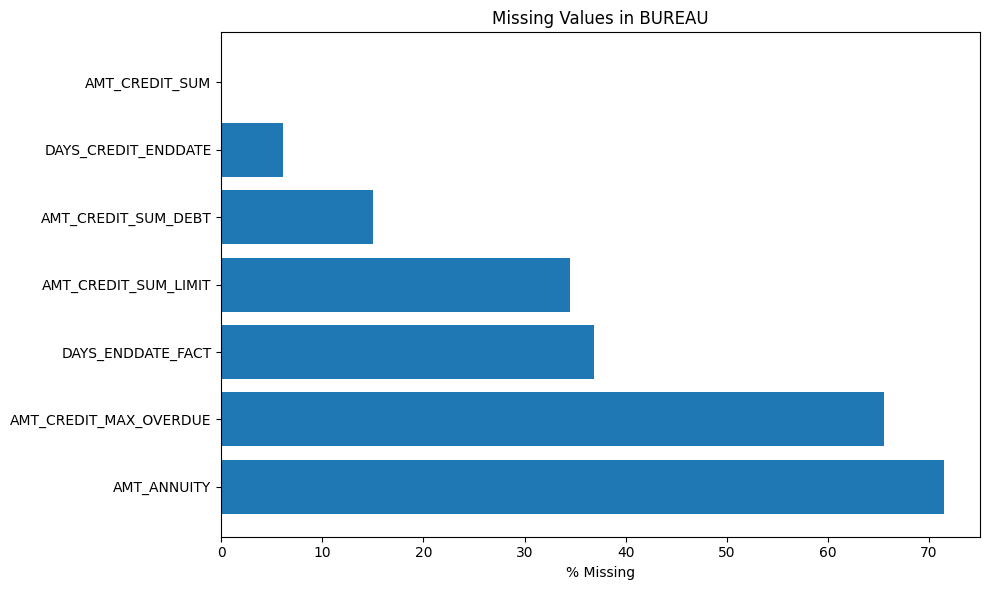

In [6]:
#Missing values

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Pct': missing_pct.values}).sort_values('Missing_Pct', ascending= False)
missing_df = missing_df[missing_df['Missing_Count'] > 10]

plt.figure(figsize=(10, 6))
plt.barh(missing_df['Column'], missing_df['Missing_Pct'])
plt.xlabel('% Missing')
plt.title('Missing Values in BUREAU')
plt.tight_layout()

In [7]:
#Days_creddit

print(f'Range: [{df["DAYS_CREDIT"].min()}, {df["DAYS_CREDIT"].max()}]')
print(f'Mean: {df["DAYS_CREDIT"].mean():.0f} days')
print(f'Median: {df["DAYS_CREDIT"].median():.0f} days')

Range: [-2922, 0]
Mean: -1142 days
Median: -987 days


Not seem to have outliers 2922 days is 8 years

In [8]:
#Credit_day_overdue

print(f'Range: [{df["CREDIT_DAY_OVERDUE"].min()}, {df["CREDIT_DAY_OVERDUE"].max()}]')
print(f'Mean: {df["CREDIT_DAY_OVERDUE"].mean():.0f} days')
print(f'Median: {df["CREDIT_DAY_OVERDUE"].median():.0f} days')

Range: [0, 2792]
Mean: 1 days
Median: 0 days


In [9]:
#extreme overdue
print(f'Total overdue more than 2 years {(df["CREDIT_DAY_OVERDUE"] > 730).sum()}')

Total overdue more than 2 years 658


Those outliers may be very usefull

In [10]:
#DAYS_CREDIT_ENDDATE

print(f'Range: [{df["DAYS_CREDIT_ENDDATE"].min()}, {df["DAYS_CREDIT_ENDDATE"].max()}]')
print(f'Missing: {df["DAYS_CREDIT_ENDDATE"].isnull().sum()} ({df["DAYS_CREDIT_ENDDATE"].isnull().sum()/len(df)*100:.1f}%)')

Range: [-42060.0, 31199.0]
Missing: 105553 (6.1%)


In [11]:
#AMT_CREDIT_SUM

print(f'Range: [{df["AMT_CREDIT_SUM"].min():,.0f}, {df["AMT_CREDIT_SUM"].max():,.0f}]')
print(f'Mean: {df["AMT_CREDIT_SUM"].mean():,.0f}')
print(f'Median: {df["AMT_CREDIT_SUM"].median():,.0f}')
print(f'Missing: {df["AMT_CREDIT_SUM"].isnull().sum()}')

Range: [0, 585,000,000]
Mean: 354,995
Median: 125,518
Missing: 13


In [12]:
#AMT_CREDIT_SUM_DEBT

print(f'Range: [{df["AMT_CREDIT_SUM_DEBT"].min():,.0f}, {df["AMT_CREDIT_SUM_DEBT"].max():,.0f}]')
print(f'Mean: {df["AMT_CREDIT_SUM_DEBT"].mean():,.0f}')
print(f'Median: {df["AMT_CREDIT_SUM_DEBT"].median():,.0f}')
print(f'Missing: {df["AMT_CREDIT_SUM_DEBT"].isnull().sum()}')

Range: [-4,705,600, 170,100,000]
Mean: 137,085
Median: 0
Missing: 257669


Debt cannot be negative, we imput it as 0

In [13]:
df.loc[df['AMT_CREDIT_SUM_DEBT'] < 0, 'AMT_CREDIT_SUM_DEBT'] = 0
df.loc[df['AMT_CREDIT_SUM_DEBT'].isnull(), 'AMT_CREDIT_SUM_DEBT'] = 0

print(f'Range: [{df["AMT_CREDIT_SUM_DEBT"].min():,.0f}, {df["AMT_CREDIT_SUM_DEBT"].max():,.0f}]')
print(f'Mean: {df["AMT_CREDIT_SUM_DEBT"].mean():,.0f}')
print(f'Median: {df["AMT_CREDIT_SUM_DEBT"].median():,.0f}')
print(f'Missing: {df["AMT_CREDIT_SUM_DEBT"].isnull().sum()}')

Range: [0, 170,100,000]
Mean: 116,544
Median: 0
Missing: 0


In [16]:
#AMT_CREDIT_SUM_LIMIT

print(f'Range: [{df["AMT_CREDIT_SUM_LIMIT"].min():,.0f}, {df["AMT_CREDIT_SUM_LIMIT"].max():,.0f}]')
print(f"Missing: {df['AMT_CREDIT_SUM_LIMIT'].isnull().sum()} ({df['AMT_CREDIT_SUM_LIMIT'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Mean (no-null): {df['AMT_CREDIT_SUM_LIMIT'].mean():,.0f}")


Range: [-586,406, 4,705,600]
Missing: 591780 (34.5%)
Mean (no-null): 6,230


In [ ]:
#AMT_CREDIT_SUM_OVERDUE

print(f'Median: {df["AMT_CREDIT_SUM_OVERDUE"].mean():,.0f}')
print(f'% With overdue: {(df["AMT_CREDIT_SUM_OVERDUE"])}')